# Explore here

In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from pickle import dump


In [4]:
# Your code here

sales_ds = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
sales_ds.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
sales_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
sales_ds['date'] = pd.to_datetime(sales_ds['date'], format="%Y-%m-%d %H:%M:%S.%f").dt.date
sales_ds

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633
...,...,...
361,2023-08-30,989.600354
362,2023-08-31,994.987326
363,2023-09-01,995.814415
364,2023-09-02,997.350214


In [7]:
sales_ds = sales_ds.set_index("date")
sales_ds.info()


<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2022-09-03 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [9]:
ts_sales = sales_ds['sales']
ts_sales

date
2022-09-03      55.292157
2022-09-04      53.803211
2022-09-05      58.141693
2022-09-06      64.530899
2022-09-07      66.013633
                 ...     
2023-08-30     989.600354
2023-08-31     994.987326
2023-09-01     995.814415
2023-09-02     997.350214
2023-09-03    1000.482785
Name: sales, Length: 366, dtype: float64

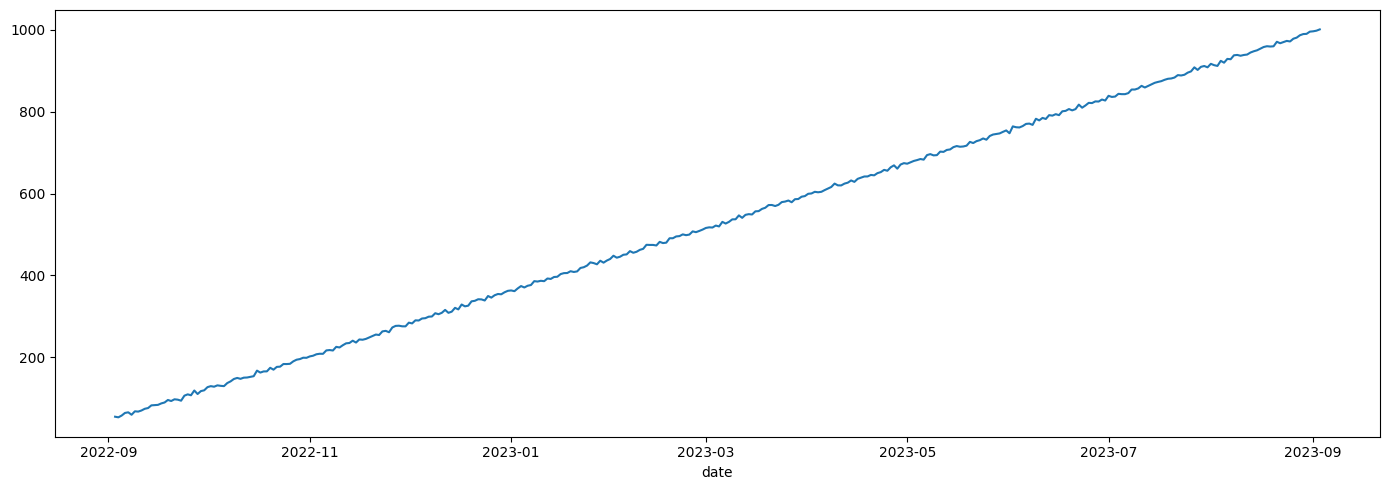

In [10]:
ts_sales.plot(figsize=(14,5))
plt.tight_layout()
plt.show()

As the plot shows, our data has a bullish trend.

Lets apply the Dickey-Fuller test, a hypothesis test where the null hypothesis is that the series is stationary, and the alternative is that it is non-stationary

In [11]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_sales)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

As the test stationarity shows, the p-value is 0.98 so the null hypothesis is accepted and rejected the alternative hypothesis.

## Seasonality analysis:

In [12]:
decomposition = seasonal_decompose(ts_sales, period = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

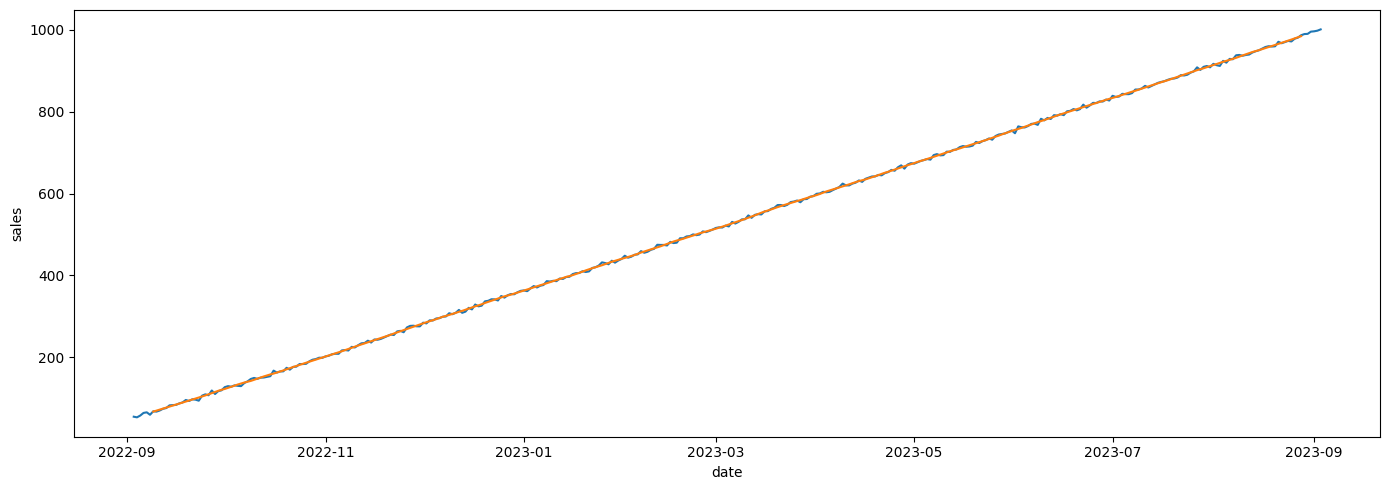

In [13]:
fig, axis = plt.subplots(figsize = (14, 5))

sns.lineplot(data = ts_sales)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

As the plot shows and also in the previous plot, the data shows a bullish trend.

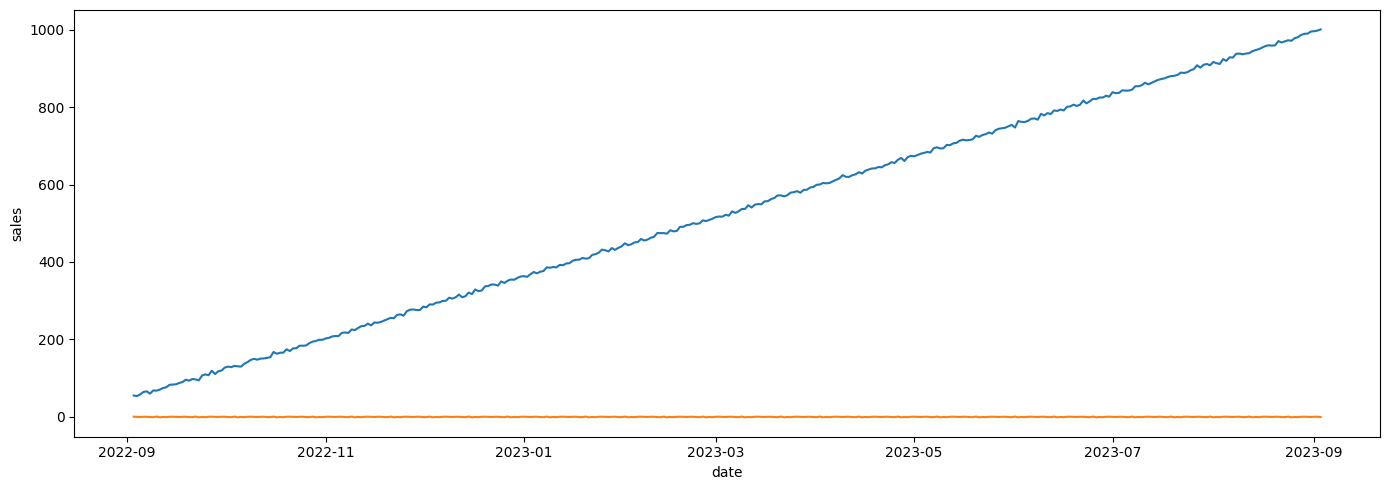

In [14]:
fig, axis = plt.subplots(figsize = (14, 5))

sns.lineplot(data = ts_sales)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

As the Dickey-Fuller test shows, the time series is not stationary.

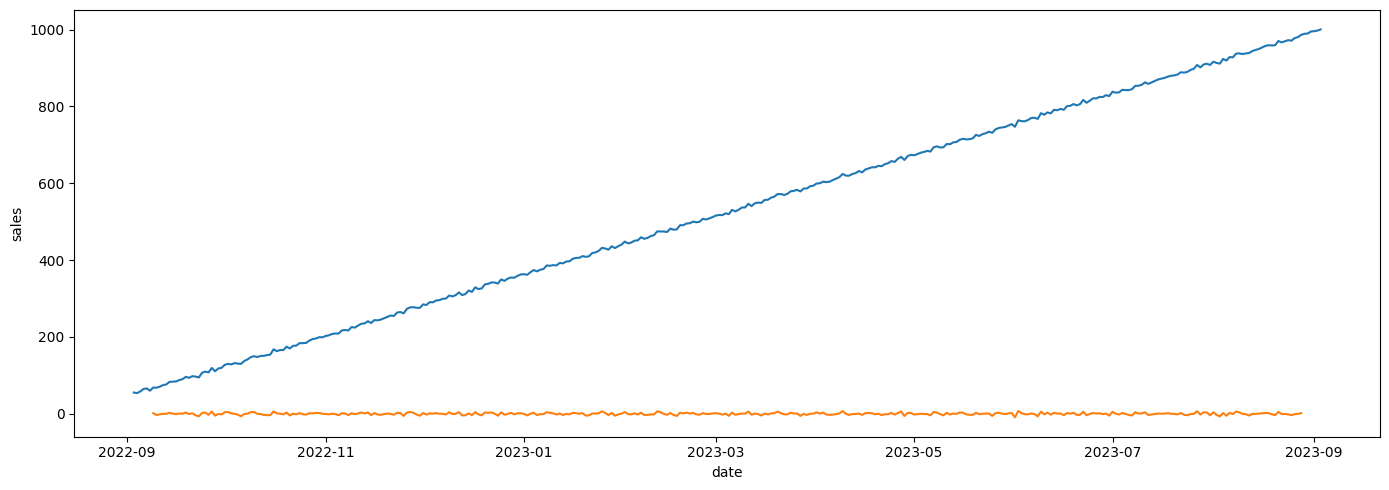

In [15]:
fig, axis = plt.subplots(figsize = (14, 5))

sns.lineplot(data = ts_sales)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

As the residual plot shows, our time series has high presence of debris and also high variability

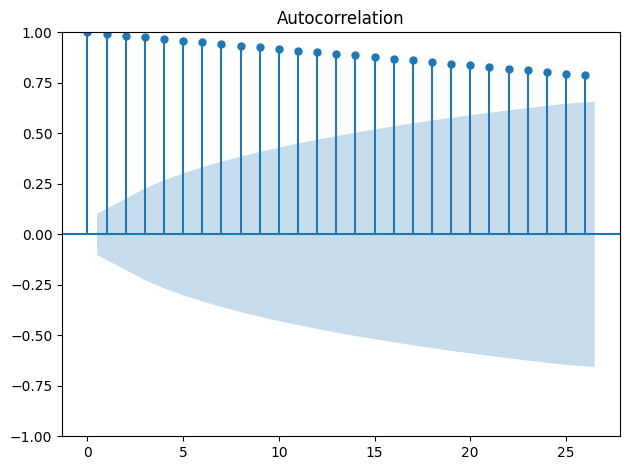

In [14]:
plot_acf(ts_sales)

plt.tight_layout()

plt.show()

The autocorrelation plot shows that through time the autocorrelation is getting lower for our time series.

In [17]:
model = auto_arima(ts_sales, seasonal = True, trace = True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=13.24 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.51 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=2.31 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2209.657, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=7.55 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=2.00 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.78 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=10.53 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=8.51 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=7.16 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=3.52 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=9.48 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  366
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood                -910.886
Date:                                Tue, 19 Dec 2023   AIC                           1837.772
Time:                                        11:11:31   BIC                           1868.971
Sample:                                    09-03-2022   HQIC                          1850.171
                                         - 09-03-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.1998      0.490     10.612      0.000       4.239       6.160
ar.L1         -0.0605      0.052     -1.159      0.246      -0.163       0.042
ar.L2          0.0348      0.057      0.610      0.542      -0.077       0.147
ma.L1         -0.9779      0.017    -57.442      0.000      -1.011      -0.945
ar.S.L7       -0.9499      0.094    -10.148      0.000      -1.133      -0.766
ma.S.L7        1.0985      0.107     10.223      0.000       0.888       1.309
ma.S.L14       0.1641      0.053      3.118      0.002       0.061       0.267
sigma2         8.4639      0.660     12.817      0.000       7.170       9.758
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.97   Prob(JB):                         0.87
Heteroskedasticity (H):               0.87   Skew:                             0.05
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
forecast = model.predict(20)
forecast

2023-09-04    1002.538065
2023-09-05    1005.499988
2023-09-06    1007.520009
2023-09-07    1010.680917
2023-09-08    1012.588786
2023-09-09    1015.522328
2023-09-10    1017.913566
2023-09-11    1020.247570
2023-09-12    1022.808000
2023-09-13    1025.536995
2023-09-14    1028.090452
2023-09-15    1031.075073
2023-09-16    1033.156225
2023-09-17    1035.980570
2023-09-18    1038.665621
2023-09-19    1041.313946
2023-09-20    1043.784618
2023-09-21    1046.429297
2023-09-22    1048.663380
2023-09-23    1051.755949
Freq: D, dtype: float64

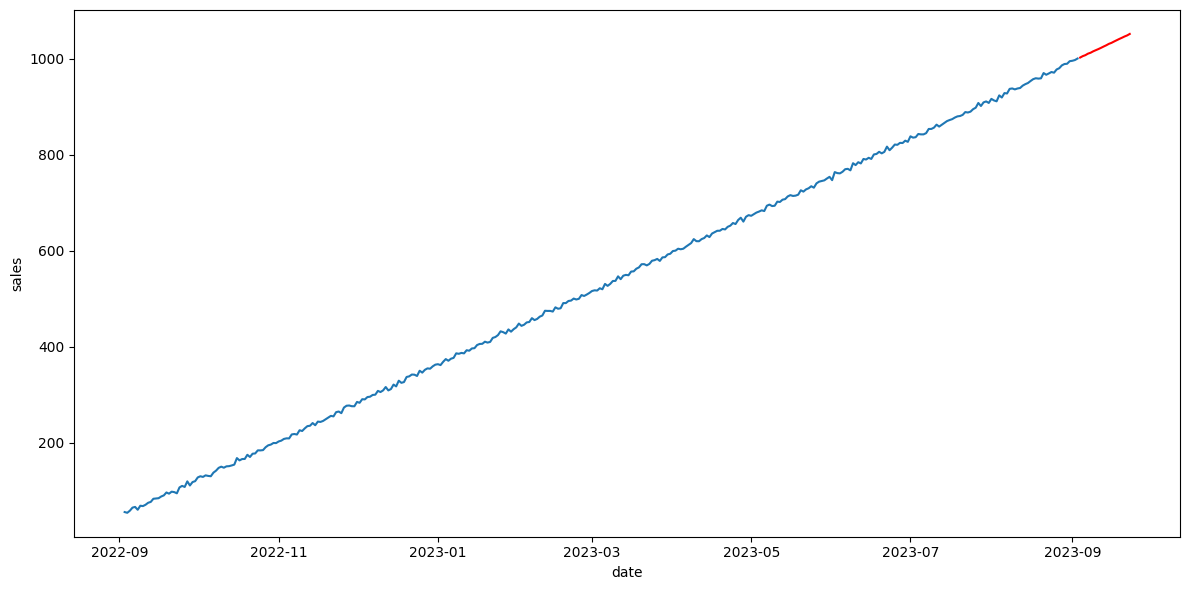

In [20]:
fig, axis = plt.subplots(figsize = (12, 6))

sns.lineplot(data = ts_sales)
sns.lineplot(data = forecast, c = "red")

plt.tight_layout()

plt.show()

As the plot shows, the forecast is really similar to the time series it self.

Save the model

In [24]:
dump(model, open("/workspace/series-de-tiempo/models/auto_arima_seasonal-True_trace-True_m-7.sav", "wb"))